In [51]:
# Import the dependencies
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, classification_report, roc_auc_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
import seaborn as sns
from sklearn.svm import SVC
from imblearn.over_sampling import SMOTE
# dataframe to image library
import dataframe_image as dfi
from imblearn.combine import SMOTEENN
from sklearn.ensemble import RandomForestClassifier
import warnings
warnings.filterwarnings("ignore")

In [2]:
diabetes_df = pd.read_csv("Resources/diabetes_prediction_dataset.csv")
diabetes_df

,gender,age,hypertension,heart_disease,smoking_history,bmi,HbA1c_level,blood_glucose_level,diabetes
0,Female,80.0,0,1,never,25.19,6.6,140,0
1,Female,54.0,0,0,No Info,27.32,6.6,80,0
2,Male,28.0,0,0,never,27.32,5.7,158,0
3,Female,36.0,0,0,current,23.45,5.0,155,0
4,Male,76.0,1,1,current,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...,...
99995,Female,80.0,0,0,No Info,27.32,6.2,90,0
99996,Female,2.0,0,0,No Info,17.37,6.5,100,0
99997,Male,66.0,0,0,former,27.83,5.7,155,0
99998,Female,24.0,0,0,never,35.42,4.0,100,0


In [3]:
# check the dimensions or no of rows n columns
diabetes_df.shape

(100000, 9)

In [4]:
# Explore the data
diabetes_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 9 columns):
 #   Column               Non-Null Count   Dtype  
---  ------               --------------   -----  
 0   gender               100000 non-null  object 
 1   age                  100000 non-null  float64
 2   hypertension         100000 non-null  int64  
 3   heart_disease        100000 non-null  int64  
 4   smoking_history      100000 non-null  object 
 5   bmi                  100000 non-null  float64
 6   HbA1c_level          100000 non-null  float64
 7   blood_glucose_level  100000 non-null  int64  
 8   diabetes             100000 non-null  int64  
dtypes: float64(3), int64(4), object(2)
memory usage: 6.9+ MB


There are total 100000 records and 9 features in the dataset.
Features are Object, float and integer type.
There are zero NaN values in the dataset.
In diabetes column, 0 represents, Doesn't have diabetes(Absence of diabetes), 1 represents Has diabetes(Presence of diabetes).

<AxesSubplot:>

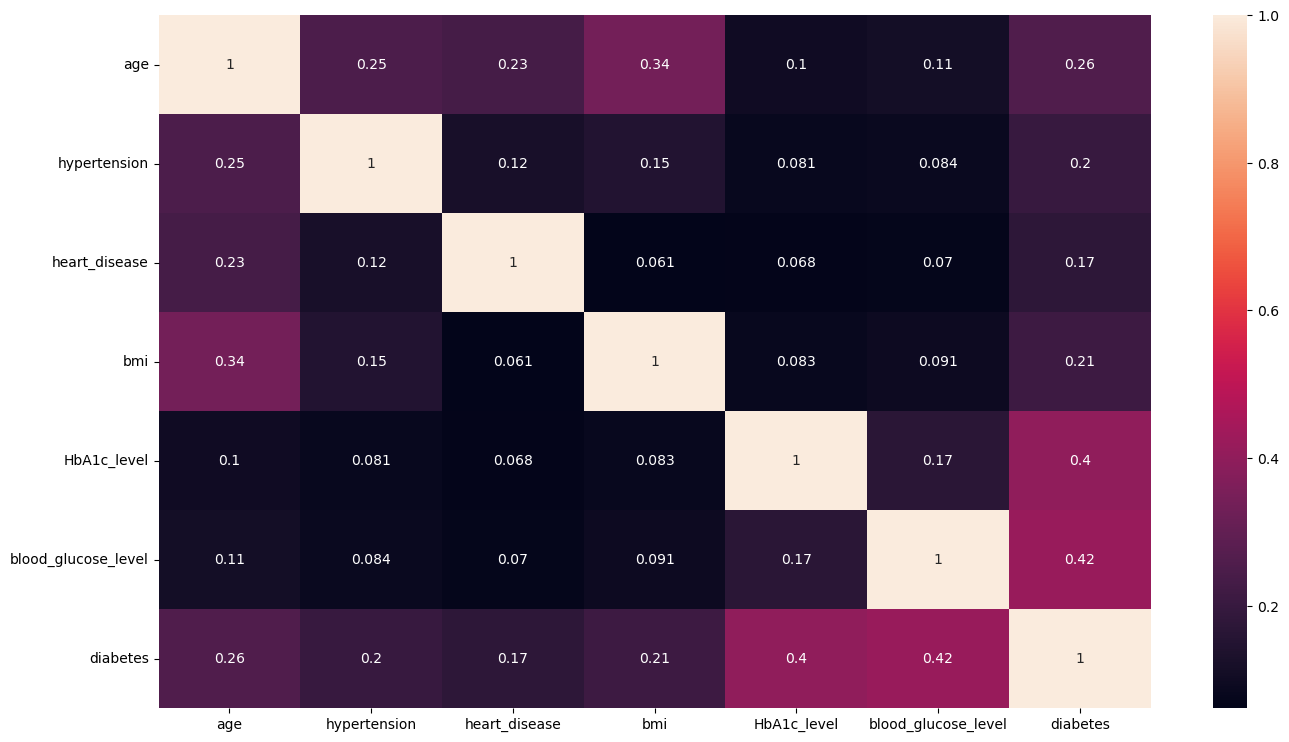

In [5]:
# Heatmap
plt.figure(figsize=(16, 9))
sns.heatmap(diabetes_df.corr(), annot=True)

From the correlation heatmap, we can see that there is high correlation between diabetes and 

In [6]:
# Check the mix of target variables
diabetes_df["diabetes"].value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [7]:
# Change gender column values to 0, 1, 2
diabetes_df["gender"].replace({"Female": 0, "Male": 1, "Other": 2}, inplace = True)

In [ ]:
# Change Smoking histoy columns to -1, 0, 1, 2, 3, 4
#diabetes_df["smoking_history"].replace({'No Info':-1,'never':0,'former':1,'current':2,'not current':3,'ever':4}, inplace = True)

In [8]:
diabetes_df.drop(columns='smoking_history', axis=1, inplace=True)
diabetes_df

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level,diabetes
0,0,80.0,0,1,25.19,6.6,140,0
1,0,54.0,0,0,27.32,6.6,80,0
2,1,28.0,0,0,27.32,5.7,158,0
3,0,36.0,0,0,23.45,5.0,155,0
4,1,76.0,1,1,20.14,4.8,155,0
...,...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90,0
99996,0,2.0,0,0,17.37,6.5,100,0
99997,1,66.0,0,0,27.83,5.7,155,0
99998,0,24.0,0,0,35.42,4.0,100,0


In [9]:
#check for null values in dataset
diabetes_df.isnull().sum()

gender                 0
age                    0
hypertension           0
heart_disease          0
bmi                    0
HbA1c_level            0
blood_glucose_level    0
diabetes               0
dtype: int64

In [10]:
# Determine the number of unique values in each column
diabetes_df.nunique()

gender                    3
age                     102
hypertension              2
heart_disease             2
bmi                    4247
HbA1c_level              18
blood_glucose_level      18
diabetes                  2
dtype: int64

In [11]:
# Look at gender for binning
gender_counts = diabetes_df["gender"].value_counts()
gender_counts

0    58552
1    41430
2       18
Name: gender, dtype: int64

In [12]:
diabetes_df.columns

Index(['gender', 'age', 'hypertension', 'heart_disease', 'bmi', 'HbA1c_level',
       'blood_glucose_level', 'diabetes'],
      dtype='object')

In [13]:
# Separate the data into labels and features
X = diabetes_df.drop(columns = "diabetes")

# Separate the y variable, the labels
y = diabetes_df["diabetes"]

# Separate the X variable, the features
X.shape

(100000, 7)

In [14]:
# Review the y variable
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [15]:
# Review the X variable DataFrame
X

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155
...,...,...,...,...,...,...,...
99995,0,80.0,0,0,27.32,6.2,90
99996,0,2.0,0,0,17.37,6.5,100
99997,1,66.0,0,0,27.83,5.7,155
99998,0,24.0,0,0,35.42,4.0,100


In [16]:
# Check the balance of our target values
y.value_counts()

0    91500
1     8500
Name: diabetes, dtype: int64

In [17]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state = 1, stratify = y)

In [18]:
# Checking dimensions
print(f"X_train shape:", X_train.shape)
print(f"X_test shape:", X_test.shape)
print(f"y_train shape:", y_train.shape)
print(f"y_test shape:", y_test.shape)


X_train shape: (75000, 7)
X_test shape: (25000, 7)
y_train shape: (75000,)
y_test shape: (25000,)


DATA MODELING

In [19]:
# Import the LogisticRegression module from sklearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression Model
# Assign a random_state parameter of 1 to the model
LogReg = LogisticRegression(random_state = 1)

# Fit the model using training data
LogReg.fit(X_train, y_train)

LogisticRegression(random_state=1)

In [20]:
# k nearest neighbors Algorithm
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors = 24, metric = 'minkowski', p =2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=24)

In [21]:
# Support Vector Classifier Algorithm
svc = SVC(kernel = 'linear', random_state = 42)
svc.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [22]:
# Making predictions on test dataset

y_pred_LogReg = LogReg.predict(X_test)
y_pred_knn = knn.predict(X_test)
y_pred_svc = svc.predict(X_test)

In [24]:
# Make the prediction using the training and testing data
y_pred = LogReg.predict(X_test)

print(f"Training Data Score: {LogReg.score(X_train, y_train)}")
print(f"Testing Data Score: {LogReg.score(X_test, y_test)}")

Training Data Score: 0.9591466666666667
Testing Data Score: 0.95864


In [25]:
# Evaluating using accuracy_score metric
from sklearn.metrics import accuracy_score
accuracy_LogReg = accuracy_score(y_test, y_pred_LogReg)
accuracy_knn = accuracy_score(y_test, y_pred_knn)
accuracy_svc = accuracy_score(y_test, y_pred_svc)

In [26]:
# Accuracy on test set
print(f"LogisticRegression:" + str(accuracy_LogReg * 100))
print(f"K Nearest Neighbors:" + str(accuracy_knn * 100))
print(f"Support Vector Classifier:" + str(accuracy_svc * 100))

LogisticRegression:95.864
K Nearest Neighbors:95.15599999999999
Support Vector Classifier:95.93199999999999


In [27]:
# Review the results side by side
results = pd.DataFrame({"prediction": y_pred, "Actual": y_test}).reset_index(drop = True)
results.head(100)

,prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


In [28]:
# print the balanced accuracy score of the model
from sklearn.metrics import balanced_accuracy_score
print(f"balanced_accuracy_score: {balanced_accuracy_score(y_test, y_pred)}")

balanced_accuracy_score: 0.8034484088717454


In [29]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, y_pred_svc)

array([[22733,   142],
       [  875,  1250]], dtype=int64)

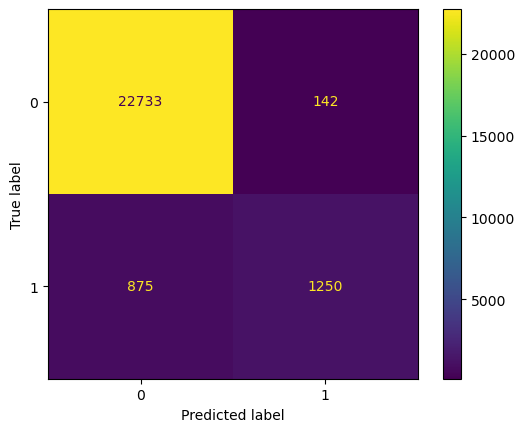

In [33]:
# View confusionmatrix display
# follow documentation to generate ConfusionMatrixDisplay

cm = confusion_matrix(y_test, y_pred_svc)
disp = confusion_matrix(y_test, y_pred_svc, labels = LogReg.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = LogReg.classes_)

disp.plot()

plt.show()

In [34]:
#print the classification report for the model
target_names = ["Doesn't have Diabetes", "Has Diabetes", ]
print(classification_report(y_test, y_pred, target_names = target_names))

                       precision    recall  f1-score   support

Doesn't have Diabetes       0.97      0.99      0.98     22875
         Has Diabetes       0.86      0.62      0.72      2125

             accuracy                           0.96     25000
            macro avg       0.91      0.80      0.85     25000
         weighted avg       0.96      0.96      0.96     25000



In [36]:
# # Import the RandomOverSampler module from imbalanced-learn
# from imblearn.over_sampling import RandomOverSampler

# # Instantiate the Random oversampler model
# # Assign a random_state parameter of 1 to the model
# random_oversampler_model = RandomOverSampler(random_state = 1)

# # Fit the original training data to the random_oversampler model
# X_resample, y_resample = random_oversampler_model.fit_resample(X_train, y_train)


In [37]:
# # Count the distinct values of the resampled labels data
# y_resample.value_counts()

0    68625
1    68625
Name: diabetes, dtype: int64

In [38]:
# # Instantiate the LogisticRegression model
# # Assign a random_state parameter of 1 to the model

# Resampled_model = LogisticRegression(random_state = 1)

# # Fit the model using the resampled training data
# Resampled_model.fit(X_resample, y_resample)

# # Make a prediction using the testing data
# Predictions = Resampled_model.predict(X_test)

In [39]:
# Final_results = pd.DataFrame({"prediction": Predictions, "Actual": y_test}).reset_index(drop = True)
# Final_results.head(100)

,prediction,Actual
0,0,0
1,0,0
2,0,0
3,0,0
4,0,0
...,...,...
95,0,0
96,0,0
97,0,0
98,0,0


In [40]:
# # Print the balanced accuracy score of the model
# balanced_accuracy_score(y_test, Predictions)

0.8815249116039858

In [41]:
# Generate a confusion matrix for the model
confusion_matrix(y_test, Predictions)

array([[20372,  2503],
       [  271,  1854]], dtype=int64)

In [42]:
# Print the classification report for the model
print(classification_report(y_test, Predictions, target_names = ["Doen't have Diabetes", "Has Diabetes", ]))

                      precision    recall  f1-score   support

Doen't have Diabetes       0.99      0.89      0.94     22875
        Has Diabetes       0.43      0.87      0.57      2125

            accuracy                           0.89     25000
           macro avg       0.71      0.88      0.75     25000
        weighted avg       0.94      0.89      0.91     25000



In [43]:
# classification report
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_knn))

              precision    recall  f1-score   support

           0       0.95      1.00      0.97     22875
           1       0.97      0.45      0.61      2125

    accuracy                           0.95     25000
   macro avg       0.96      0.72      0.79     25000
weighted avg       0.95      0.95      0.94     25000



In [44]:
models={
    "LogisticRegression": LogisticRegression(),
    "KNeighborsClassifier": KNeighborsClassifier(),
    "SVC": SVC()
}

In [45]:

sm=SMOTE()
X_train, y_train=sm.fit_resample(X, y)
accuracies=[]
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred=model.predict(X_test)

    AS=accuracy_score(y_test, y_pred)
    RAS=roc_auc_score(y_test, y_pred)
    accuracies.append(AS)

    print(f'Results for {name}')
    print('Accuracy score:', AS)
    print('roc_auc_score:', RAS)

    print()

Results for LogisticRegression
Accuracy score: 0.88388
roc_auc_score: 0.872942462230794

Results for KNeighborsClassifier
Accuracy score: 0.94064
roc_auc_score: 0.9575313404050144

Results for SVC
Accuracy score: 0.87556
roc_auc_score: 0.8920874316939891



In [ ]:
#  
# dfi.export(report_df, 'classification_report.png')

In [52]:
X.head()

,gender,age,hypertension,heart_disease,bmi,HbA1c_level,blood_glucose_level
0,0,80.0,0,1,25.19,6.6,140
1,0,54.0,0,0,27.32,6.6,80
2,1,28.0,0,0,27.32,5.7,158
3,0,36.0,0,0,23.45,5.0,155
4,1,76.0,1,1,20.14,4.8,155


In [55]:
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: diabetes, dtype: int64

In [56]:
# splitting data into train and test sets
X_train, X_test, y_train,y_test = train_test_split(X, y, random_state = 78)

In [57]:
# Creating StandardScaler instance
scaler = StandardScaler()

In [58]:
# Fitting StandardScaler
X_scaler = scaler.fit(X_train)

In [59]:
#scaling data
X_train_scaled = X_scaler.transform(X_train)
X_test_scaled = X_scaler.transform(X_test)

In [60]:
rf_model = RandomForestClassifier(n_estimators = 500, random_state = 78)

In [61]:
rf_model = rf_model.fit(X_train_scaled, y_train)

In [62]:
predictions_rf = rf_model.predict(X_test_scaled)

In [63]:
importances = rf_model.feature_importances_
sorted(zip(rf_model.feature_importances_, X.columns), reverse= True)

[(0.4061651013059753, 'HbA1c_level'),
 (0.3246192901264396, 'blood_glucose_level'),
 (0.13868260411509967, 'bmi'),
 (0.10145827050283789, 'age'),
 (0.014075273675360071, 'hypertension'),
 (0.008934801338256018, 'heart_disease'),
 (0.006064658936031476, 'gender')]

<AxesSubplot:title={'center':'Features Importances'}, ylabel='1'>

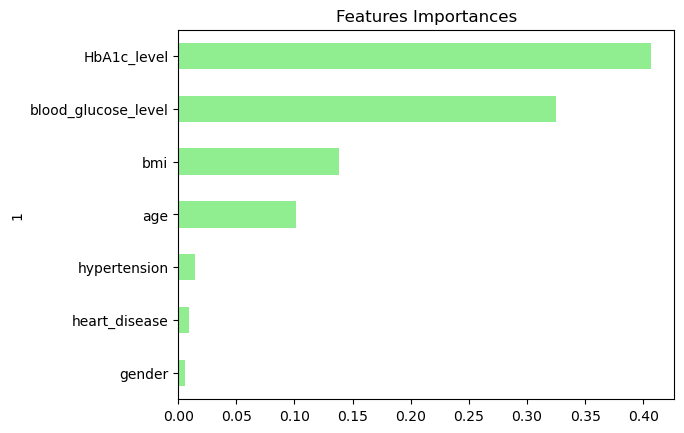

In [64]:
# Visualize the features by importance
importances_df = pd.DataFrame(sorted(zip(rf_model.feature_importances_, X.columns), reverse=True))
importances_df.set_index(importances_df[1], inplace=True)
importances_df.drop(columns=1, inplace=True)
importances_df.rename(columns={0: 'Feature Importances'}, inplace=True)
importances_sorted = importances_df.sort_values(by='Feature Importances')
importances_sorted.plot(kind='barh', color='lightgreen', title= 'Features Importances', legend=False)